##### **Imports**

In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import nltk
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from collections import Counter
import matplotlib as plt
from sklearn.naive_bayes import BernoulliNB

##### **Read in CSV**

In [4]:
# create variable for csv files in comment_data folder to read in
files = os.listdir('longevitycomments_data')
data_folder = 'longevitycomments_data/'
list_dataframe=[]
# create a loop to read in csv files
for file in files:
    try:
        file = pd.read_csv(data_folder+file)
        list_dataframe.append(file)
    except:
        continue
# combine both dataframes into one dataframe
df = pd.concat([list_dataframe[0],list_dataframe[1]], ignore_index=True)
# drop first column
df.drop(columns='Unnamed: 0', inplace=True)
# print shape
print(df.shape)

(51700, 5)


In [5]:
# display first 5 rows of dataframe
df.head()

,author,body,score,created_utc,subreddit
0,CtotheW,"I agree, but insofar as up until recently(200i...",1,1625152630,askscience
1,CorticalBaggage,Think of additional vaccinations as additional...,1,1624663627,askscience
2,MayorLag,I have no authority to claim anything as a fac...,24,1623679339,askscience
3,stupidhoes,And we are merely 100s I'd thousands of a blip...,1,1623674627,askscience
4,xXugleprutXx,While the process of having children isn't pro...,2,1623256286,askscience


In [6]:
# create dictionary to binarize subreddits
subreddit_dict = {'longevity':0,
            'askscience':1}
# map function to replace subreddits to binarize
df['subreddit'] = df['subreddit'].map(subreddit_dict)

In [7]:
# print total rows in body with [removed], [deleted], and null values
print((df['body'] == "[removed]").sum())
print((df['body'] == "[deleted]").sum())
print((df['body'].isna().sum()))

0
0
0


In [8]:
# regex function to return only letters in body
df['body'] = df['body'].map(lambda x: re.sub("[^a-zA-Z]", " ", x))

TypeError: 'module' object is not callable

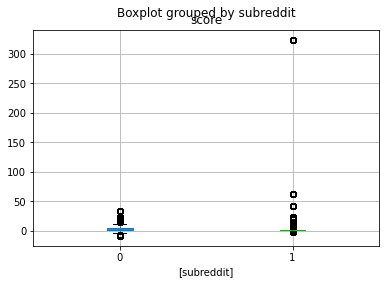

In [35]:
df.boxplot(column=['score'], by=['subreddit'])
plt.figure(figsize=(20,20))

In [8]:
X= df['body']
y= df['subreddit']

In [10]:
X = [word.lower().split() for word in df['body']]
stops = set(stopwords.words('english'))
stopwords = ('https', 'www', 'com', 'like')
posts_list = []
for post in X:
    meaningful_words = [word for word in post if word not in stops or stop_words]
    meaningful_post = " ".join(meaningful_words)
    posts_list.append(meaningful_post)
    
modeltext = pd.Series(posts_list)
df['modeltext'] = modeltext
X = df['modeltext']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,
                                   y,
                                   train_size=0.75,
                                   stratify=y,
                                   random_state=42)

In [11]:
y.value_counts(normalize=True)

1    0.500967
0    0.499033
Name: subreddit, dtype: float64

In [14]:
cvec = CountVectorizer(max_features=5_000, stop_words=('english'))
text_transformed = cvec.fit_transform(X)
feature_names = cvec.get_feature_names()

text_transformed=pd.DataFrame(text_transformed.todense())
text_transformed.columns = feature_names
(text_transformed.sum().sort_values(ascending = False).head(15))

longevity    75187
https        49075
com          35624
www          23770
reddit       20125
cancer       17867
old          17041
like         16041
aging        14972
comments     14964
people       14468
time         12935
age          12405
long         11906
amp          11883
dtype: int64

In [ ]:
plt.scatter(text_transformed)